In [111]:
import open3d as o3d
import copy
import numpy as np
from tensorflow import linalg
import math
import csv
import cv2
import os
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

In [3]:
dict_coordo_xyz_labels = {}

path = r'D:\StageE23\Data\Ete_2022\Participant08\autocorrection\Prise01'

with open(path+'/Positions/coordonnees_xyz.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    j = 0
    for row in reader: #skip headline
        if j == 0:
            entete = row[1::3]
            labels_xyz = [e[:-2] for e in entete]
            print(labels_xyz)
        elif j > 0:
            key = f'image{row[0]}'
            dict_coordo_xyz_labels.update({key: {}})
            row = [float(i) for i in row[1:]]
            i = 0
            for l in labels_xyz:
                dict_coordo_xyz_labels[key].update({l : [row[i], row[i+1], row[i+2]]})
                i += 3
        j += 1

['C', 'T1', 'T2', 'L', 'G', 'D', 'IG', 'ID']


In [4]:
mesh = o3d.io.read_point_cloud(r'D:\StageE23\Data\Ete_2022\Participant11\autocorrection\Prise01\xyz_removed_bg\auto_01_012915_XYZ_0.ply')

mesh_r = copy.deepcopy(mesh)
R = mesh.get_rotation_matrix_from_xyz((0, 0, 1)) #equivalent to yxz
mesh_r.rotate(R, center=(-42, -227, 1735))
o3d.visualization.draw_geometries([mesh, mesh_r])

In [5]:
dict_coordo_xyz_labels_r = {}

ID = dict_coordo_xyz_labels['image1']['ID']
IG = dict_coordo_xyz_labels['image1']['IG']
print(f'ID : {ID}, IG : {IG}')
rz = math.atan((ID[1] - IG[1])/(ID[0] - IG[0]))
rx = math.atan((ID[2] - IG[2])/(ID[0] - IG[0]))

path_pc = r'D:\StageE23\Data\Ete_2022\Participant08\autocorrection\Prise01\xyz_removed_bg'
savepath_pc = r'D:\StageE23\Data\Ete_2022\Participant08\autocorrection\Prise01\xyz_rotated'
os.makedirs(savepath_pc, exist_ok=True)

markers = o3d.geometry.PointCloud()
markers_points = dict_coordo_xyz_labels[f'image{2}'].values()
markers.points = o3d.utility.Vector3dVector(markers_points)
markers.colors = o3d.utility.Vector3dVector(np.multiply(np.array([[1,0,0]]), np.ones((8,1))))
markers_r = copy.deepcopy(markers)
markers_r.colors = o3d.utility.Vector3dVector(np.multiply(np.array([[0,1,0]]), np.ones((8,1))))

R = markers_r.get_rotation_matrix_from_xyz((0, rx, -rz))
print(R)
markers_r.rotate(R, center=(IG[0], IG[1], IG[2]))
dict_coordo_xyz_labels_r.update({f'image{2}': np.asarray(markers_r.points)})

o3d.visualization.draw_geometries([markers, markers_r])

print(dict_coordo_xyz_labels['image1'])
print(dict_coordo_xyz_labels['image2'])
print(dict_coordo_xyz_labels_r['image2'].astype(int))

ID : [57.01655, -229.58379, 1743.2013], IG : [-41.624138, -226.70938, 1734.6282]
[[ 0.99582167 -0.02901845  0.086586  ]
 [ 0.02912784  0.99957569  0.        ]
 [-0.08654926  0.00252206  0.99624438]]
{'C': [2.5073442, 176.8519, 1772.0079], 'T1': [4.147256, 98.748566, 1739.0088], 'T2': [7.5046997, 18.228354, 1733.7202], 'L': [2.4627376, -101.48687, 1745.3187], 'G': [-47.65136, -1.9974544, 1714.5927], 'D': [71.457344, 9.654943, 1708.8358], 'IG': [-41.624138, -226.70938, 1734.6282], 'ID': [57.01655, -229.58379, 1743.2013]}
{'C': [1.6419234, 176.74292, 1770.9171], 'T1': [3.2998822, 98.73337, 1738.7412], 'T2': [6.659403, 18.223717, 1733.284], 'L': [1.6125938, -101.48043, 1745.209], 'G': [-48.476204, -1.9970455, 1714.2417], 'D': [68.954704, 7.9903703, 1708.7218], 'IG': [-43.329044, -226.758, 1734.9805], 'ID': [57.02028, -229.59882, 1743.3154]}
[[  -7  177 1768]
 [  -5   99 1735]
 [   0   19 1729]
 [  -1 -100 1741]
 [ -56   -2 1715]
 [  59   11 1699]
 [ -43 -226 1735]
 [  57 -226 1734]]


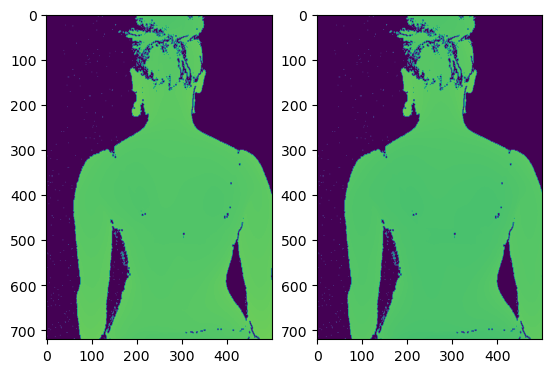

In [22]:
w = 1936
h = 1176
header_size = 512
file_path = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\auto_01_007367_XYZ_0.raw'

with open(file_path, 'r') as f:
        f.seek(header_size)
        xyz = np.fromfile(f, np.float32).reshape((h*w,3))

xyz_r = np.matmul(xyz, R)
xyz_r = np.asarray(xyz_r).reshape((h,w,3))

xyz = np.asarray(xyz).reshape((h,w,3))
xyz = xyz.astype(np.uint16)
z = xyz[:,:,2].T
z = z[-1:0:-1, :][560:1280, 350:850]

xyz_r = xyz_r.astype(np.uint16)
z_r = xyz_r[:,:,2].T
z_r = z_r[-1:0:-1, :][560:1280, 350:850]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z)
ax2.imshow(z_r)
plt.show()

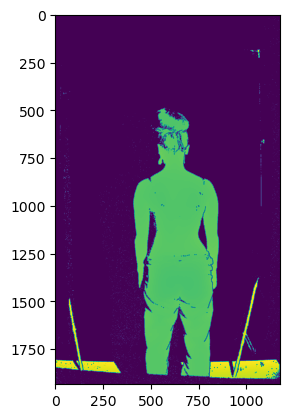

In [88]:
path = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01'
save_path_xyz = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\xyz_images'

w = 1936
h = 1176
header_size = 512
os.makedirs(save_path_xyz, exist_ok=True)

for file in os.listdir(path)[0:5]:
    if '_XYZ_' in file:
        with open(os.path.join(path, file), 'r') as f:
            f.seek(header_size)
            data_array = np.fromfile(f, np.float32).reshape((h,w,3))

        x_array = data_array[:,:,0].T
        x = x_array[-1:0:-1, :]
        
        y_array = data_array[:,:,1].T
        y = y_array[-1:0:-1, :]

        z_array = data_array[:,:,2].T
        z = z_array[-1:0:-1, :]
        
        plt.imshow(z)
        xyz = np.dstack((x, y, z))

        np.save(save_path_xyz+'/'+file[:-4], xyz)
        
        cv2.imwrite(save_path_xyz+'/'+file[:-4]+'_x.png', x)
        cv2.imwrite(save_path_xyz+'/'+file[:-4]+'_y.png', y)
        cv2.imwrite(save_path_xyz+'/'+file[:-4]+'_z.png', z)
        cv2.imwrite(save_path_xyz+'/'+file[:-4]+'_xyz.png', xyz)



1912.4766 2597.312


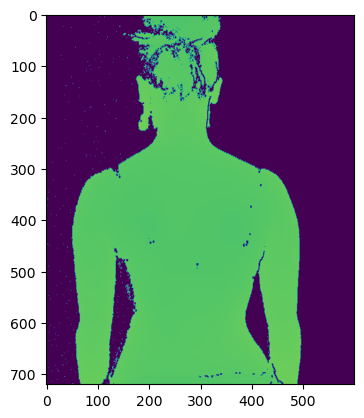

In [90]:
xyz = np.load(r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\xyz_images\auto_01_007367_XYZ_0.npy')
z = xyz[:,:,2][560:1280, 360:960]

plt.imshow(z)
print(z[300, 300], np.max(z))

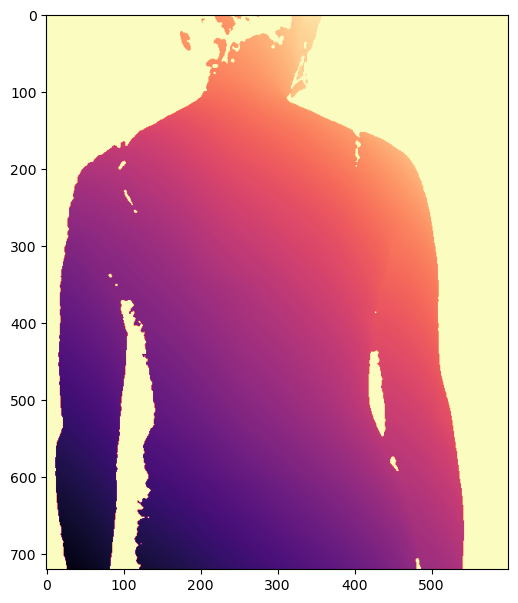

In [118]:
matrix_R = np.asarray([[1,1,1], [1,1,1], [.5, .5, .5]])

xyz = np.load(r'D:\StageE23\Data\Ete_2022\Participant05\autocorrection\Prise02\xyz_images\auto_02_011077_XYZ_0.npy')
xyz_r = copy.deepcopy(xyz)

xyz_r = linalg.matmul(xyz, matrix_R)
xyz_r = np.asarray(xyz_r)

z = xyz_r[:,:,2][560:1280, 300:900]
z = z.astype(int)
z = median_filter(z, 5)
z[z == 0] = np.max(z) + 50 #convert background at 0 to deepest

fig, ax = plt.subplots(1,1, figsize=(6, 7.2))
plt.imshow(z, cmap = 'magma')
plt.show()
